## Athul Krishna

## Final project, regression problem

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv")

In [3]:
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [4]:
df.describe()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Property GFA - Self-Reported (ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,11746.000000,11746.000000,11746.000000,1.174600e+04,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1948.738379,1.289971,98.762557,1.673739e+05,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,30.576386,4.017484,7.501603,3.189238e+05,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,1600.000000,0.000000,0.000000,0.000000e+00,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,1927.000000,1.000000,100.000000,6.699400e+04,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,1941.000000,1.000000,100.000000,9.408000e+04,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1966.000000,1.000000,100.000000,1.584140e+05,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,2019.000000,161.000000,100.000000,1.421712e+07,40.912869,-73.715543,56.000000,51.000000,155101.000000


In [5]:
df.iloc[0:16,28:41]

,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu)
0,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available
1,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441
2,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
3,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
4,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
5,55,359.9,359,8.3,4.8,411.5,Not Available,2.00832154E7,Not Available,Not Available,Not Available,-4.690796909E8,1.4322508769E9
6,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
7,Not Available,143974.4,143976,Not Available,1439.7,151174.5,Not Available,1.37367028E7,Not Available,Not Available,Not Available,Not Available,394285242148
8,Not Available,1138.3,1091.5,319.9,Not Available,3427.3,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
9,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available


In [6]:
df[["ENERGY STAR Score"]].value_counts()

ENERGY STAR Score
Not Available        2104
100                   649
1                     299
99                    162
80                    144
                     ... 
17                     48
12                     47
42                     47
21                     46
11                     44
Name: count, Length: 101, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

#### We will do a little preprocessing on the Data

In [8]:
df.replace("Not Available", np.nan, inplace=True)      
#now we know the exact amount of Nan values

In [9]:
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,NaN,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,NaN,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,NaN,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,NaN,...,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [10]:
missing_values_count = df.isnull().sum()
print(missing_values_count)     

Order                                                             0
Property Id                                                       0
Property Name                                                     0
Parent Property Id                                                0
Parent Property Name                                              0
BBL - 10 digits                                                  11
NYC Borough, Block and Lot (BBL) self-reported                   11
NYC Building Identification Number (BIN)                        162
Address 1 (self-reported)                                         0
Address 2                                                     11539
Postal Code                                                       0
Street Number                                                   124
Street Name                                                     122
Borough                                                         118
DOF Gross Floor Area                            

In [11]:
df['ENERGY STAR Score'] = df['ENERGY STAR Score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

In [12]:
df[["ENERGY STAR Score"]].value_counts()

ENERGY STAR Score
100.0                649
1.0                  299
99.0                 162
80.0                 144
84.0                 142
                    ... 
10.0                  48
42.0                  47
12.0                  47
21.0                  46
11.0                  44
Name: count, Length: 100, dtype: int64

In [13]:
df['Water Required?'] = df['Water Required?'].astype("category")

In [14]:
df["Water Required?"].value_counts()

Water Required?
Yes    7552
No     4076
Name: count, dtype: int64

In [15]:
null_percentage=df.isnull().sum()/len(df) * 100
null_percentage

Order                                                          0.000000
Property Id                                                    0.000000
Property Name                                                  0.000000
Parent Property Id                                             0.000000
Parent Property Name                                           0.000000
BBL - 10 digits                                                0.093649
NYC Borough, Block and Lot (BBL) self-reported                 0.093649
NYC Building Identification Number (BIN)                       1.379193
Address 1 (self-reported)                                      0.000000
Address 2                                                     98.237698
Postal Code                                                    0.000000
Street Number                                                  1.055679
Street Name                                                    1.038651
Borough                                                        1

In [16]:
columns_to_drop = null_percentage[null_percentage > 19].index

In [17]:
df.drop(columns=columns_to_drop, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 40 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   Order                                                       11746 non-null  int64   
 1   Property Id                                                 11746 non-null  int64   
 2   Property Name                                               11746 non-null  object  
 3   Parent Property Id                                          11746 non-null  object  
 4   Parent Property Name                                        11746 non-null  object  
 5   BBL - 10 digits                                             11735 non-null  object  
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object  
 7   NYC Building Identification Number (BIN)                    11584 non-null  

In [19]:
df['Release Date'] = pd.to_datetime(df['Release Date']) # changing type of release date column to date time astype

df.columns

C:\Users\91907\AppData\Local\Temp\ipykernel_37884\1446657076.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date']) # changing type of release date column to date time astype


Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas U

In [20]:
# we also have a lot of columns that have float values and need to be converted to float dtype
features_to_convert = ["Site EUI (kBtu/ft²)",
       'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Weather Normalized Site Electricity (kWh)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Indirect GHG Emissions (Metric Tons CO2e)','Source EUI (kBtu/ft²)']

for column in features_to_convert:
    df[column] = df[column].astype(float)

In [21]:
df=df.drop(["Order","Property Id","Parent Property Id","Postal Code","Street Number"],axis=1)


In [22]:
df_complete= df.select_dtypes(include=['float64', 'int64'])


#### We can use this information while model training and preprocessing

In [23]:
null_percentage=df.isnull().sum()/len(df) * 100          # going to fill some values in columns with null values
null_percentage

Property Name                                                  0.000000
Parent Property Name                                           0.000000
BBL - 10 digits                                                0.093649
NYC Borough, Block and Lot (BBL) self-reported                 0.093649
NYC Building Identification Number (BIN)                       1.379193
Address 1 (self-reported)                                      0.000000
Street Name                                                    1.038651
Borough                                                        1.004597
DOF Gross Floor Area                                           1.004597
Primary Property Type - Self Selected                          0.000000
List of All Property Use Types at Property                     0.000000
Largest Property Use Type                                      0.017027
Largest Property Use Type - Gross Floor Area (ft²)             0.017027
Year Built                                                     0

In [24]:
columns_to_backfill = null_percentage[null_percentage < 3].index


In [25]:
df[columns_to_backfill] = df[columns_to_backfill].fillna(method='bfill', axis=0)

In [26]:
null_percentage=df.isnull().sum()/len(df) * 100 

In [27]:
null_percentage

Property Name                                                  0.000000
Parent Property Name                                           0.000000
BBL - 10 digits                                                0.000000
NYC Borough, Block and Lot (BBL) self-reported                 0.000000
NYC Building Identification Number (BIN)                       0.000000
Address 1 (self-reported)                                      0.000000
Street Name                                                    0.000000
Borough                                                        0.000000
DOF Gross Floor Area                                           0.000000
Primary Property Type - Self Selected                          0.000000
List of All Property Use Types at Property                     0.000000
Largest Property Use Type                                      0.000000
Largest Property Use Type - Gross Floor Area (ft²)             0.000000
Year Built                                                     0

In [28]:
df["DOF Benchmarking Submission Status"]=df["DOF Benchmarking Submission Status"].fillna("mode")

In [29]:
# the below two features are similar in property and share similar data, so imputing based on that
merged_df = df[["Site EUI (kBtu/ft²)", "Weather Normalized Site EUI (kBtu/ft²)"]].copy()
merged_df.loc[merged_df["Weather Normalized Site EUI (kBtu/ft²)"].isnull(), "Weather Normalized Site EUI (kBtu/ft²)"] = merged_df.loc[merged_df["Weather Normalized Site EUI (kBtu/ft²)"].isnull(),"Site EUI (kBtu/ft²)"]


In [30]:
df["Weather Normalized Site EUI (kBtu/ft²)"]=merged_df["Weather Normalized Site EUI (kBtu/ft²)"]

In [31]:
df["Release Date"].value_counts

<bound method IndexOpsMixin.value_counts of 0       2017-05-01 17:32:03
1       2017-04-27 11:23:27
2       2017-04-27 11:23:27
3       2017-04-27 11:23:27
4       2017-04-27 11:23:27
                ...        
11741   2017-04-26 11:20:06
11742   2017-04-26 11:20:06
11743   2017-03-23 14:51:02
11744   2017-04-26 11:20:06
11745   2017-04-27 06:37:53
Name: Release Date, Length: 11746, dtype: datetime64[ns]>

In [32]:
merged_df = df[["Source EUI (kBtu/ft²)", "Weather Normalized Source EUI (kBtu/ft²)"]].copy()
merged_df.loc[merged_df["Weather Normalized Source EUI (kBtu/ft²)"].isnull(), "Weather Normalized Source EUI (kBtu/ft²)"] = merged_df.loc[merged_df["Weather Normalized Source EUI (kBtu/ft²)"].isnull(),"Source EUI (kBtu/ft²)"]
df["Weather Normalized Source EUI (kBtu/ft²)"]=merged_df["Weather Normalized Source EUI (kBtu/ft²)"]


In [33]:
null_percentage=df.isnull().sum()/len(df) * 100 
null_percentage

Property Name                                                  0.000000
Parent Property Name                                           0.000000
BBL - 10 digits                                                0.000000
NYC Borough, Block and Lot (BBL) self-reported                 0.000000
NYC Building Identification Number (BIN)                       0.000000
Address 1 (self-reported)                                      0.000000
Street Name                                                    0.000000
Borough                                                        0.000000
DOF Gross Floor Area                                           0.000000
Primary Property Type - Self Selected                          0.000000
List of All Property Use Types at Property                     0.000000
Largest Property Use Type                                      0.000000
Largest Property Use Type - Gross Floor Area (ft²)             0.000000
Year Built                                                     0

In [34]:
df[["Weather Normalized Site Electricity Intensity (kWh/ft²)"]].describe()

,Weather Normalized Site Electricity Intensity (kWh/ft²)
count,10959.000000
mean,11.072643
std,127.733868
min,0.000000
25%,3.800000
50%,5.300000
75%,9.200000
max,6259.400000


In [35]:
df[["Weather Normalized Site Electricity Intensity (kWh/ft²)"]].value_counts()

Weather Normalized Site Electricity Intensity (kWh/ft²)
4.0                                                        230
4.1                                                        221
3.7                                                        218
4.5                                                        218
3.8                                                        217
                                                          ... 
39.1                                                         1
38.9                                                         1
38.8                                                         1
38.4                                                         1
6259.4                                                       1
Name: count, Length: 440, dtype: int64

## EDA

In [36]:
df_complete= df.select_dtypes(include=['float64', 'int64'])

In [37]:
correlation_matrix = df_complete.corr()

correlation_with_target = correlation_matrix['ENERGY STAR Score']

In [38]:
print("Correlation of all features with 'Energy Star Score':")
print(correlation_with_target)

Correlation of all features with 'Energy Star Score':
DOF Gross Floor Area                                          0.005107
Year Built                                                   -0.118181
Number of Buildings - Self-reported                          -0.020564
Occupancy                                                    -0.031116
ENERGY STAR Score                                             1.000000
Site EUI (kBtu/ft²)                                          -0.036123
Weather Normalized Site EUI (kBtu/ft²)                       -0.035460
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.067762
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.023008
Weather Normalized Source EUI (kBtu/ft²)                     -0.041785
Natural Gas Use (kBtu)                                       -0.026170
Weather Normalized Site Natural Gas Use (therms)             -0.026215
Electricity Use - Grid Purchase (kBtu)                       -0.064313
Weather Normalized Site

<Axes: >

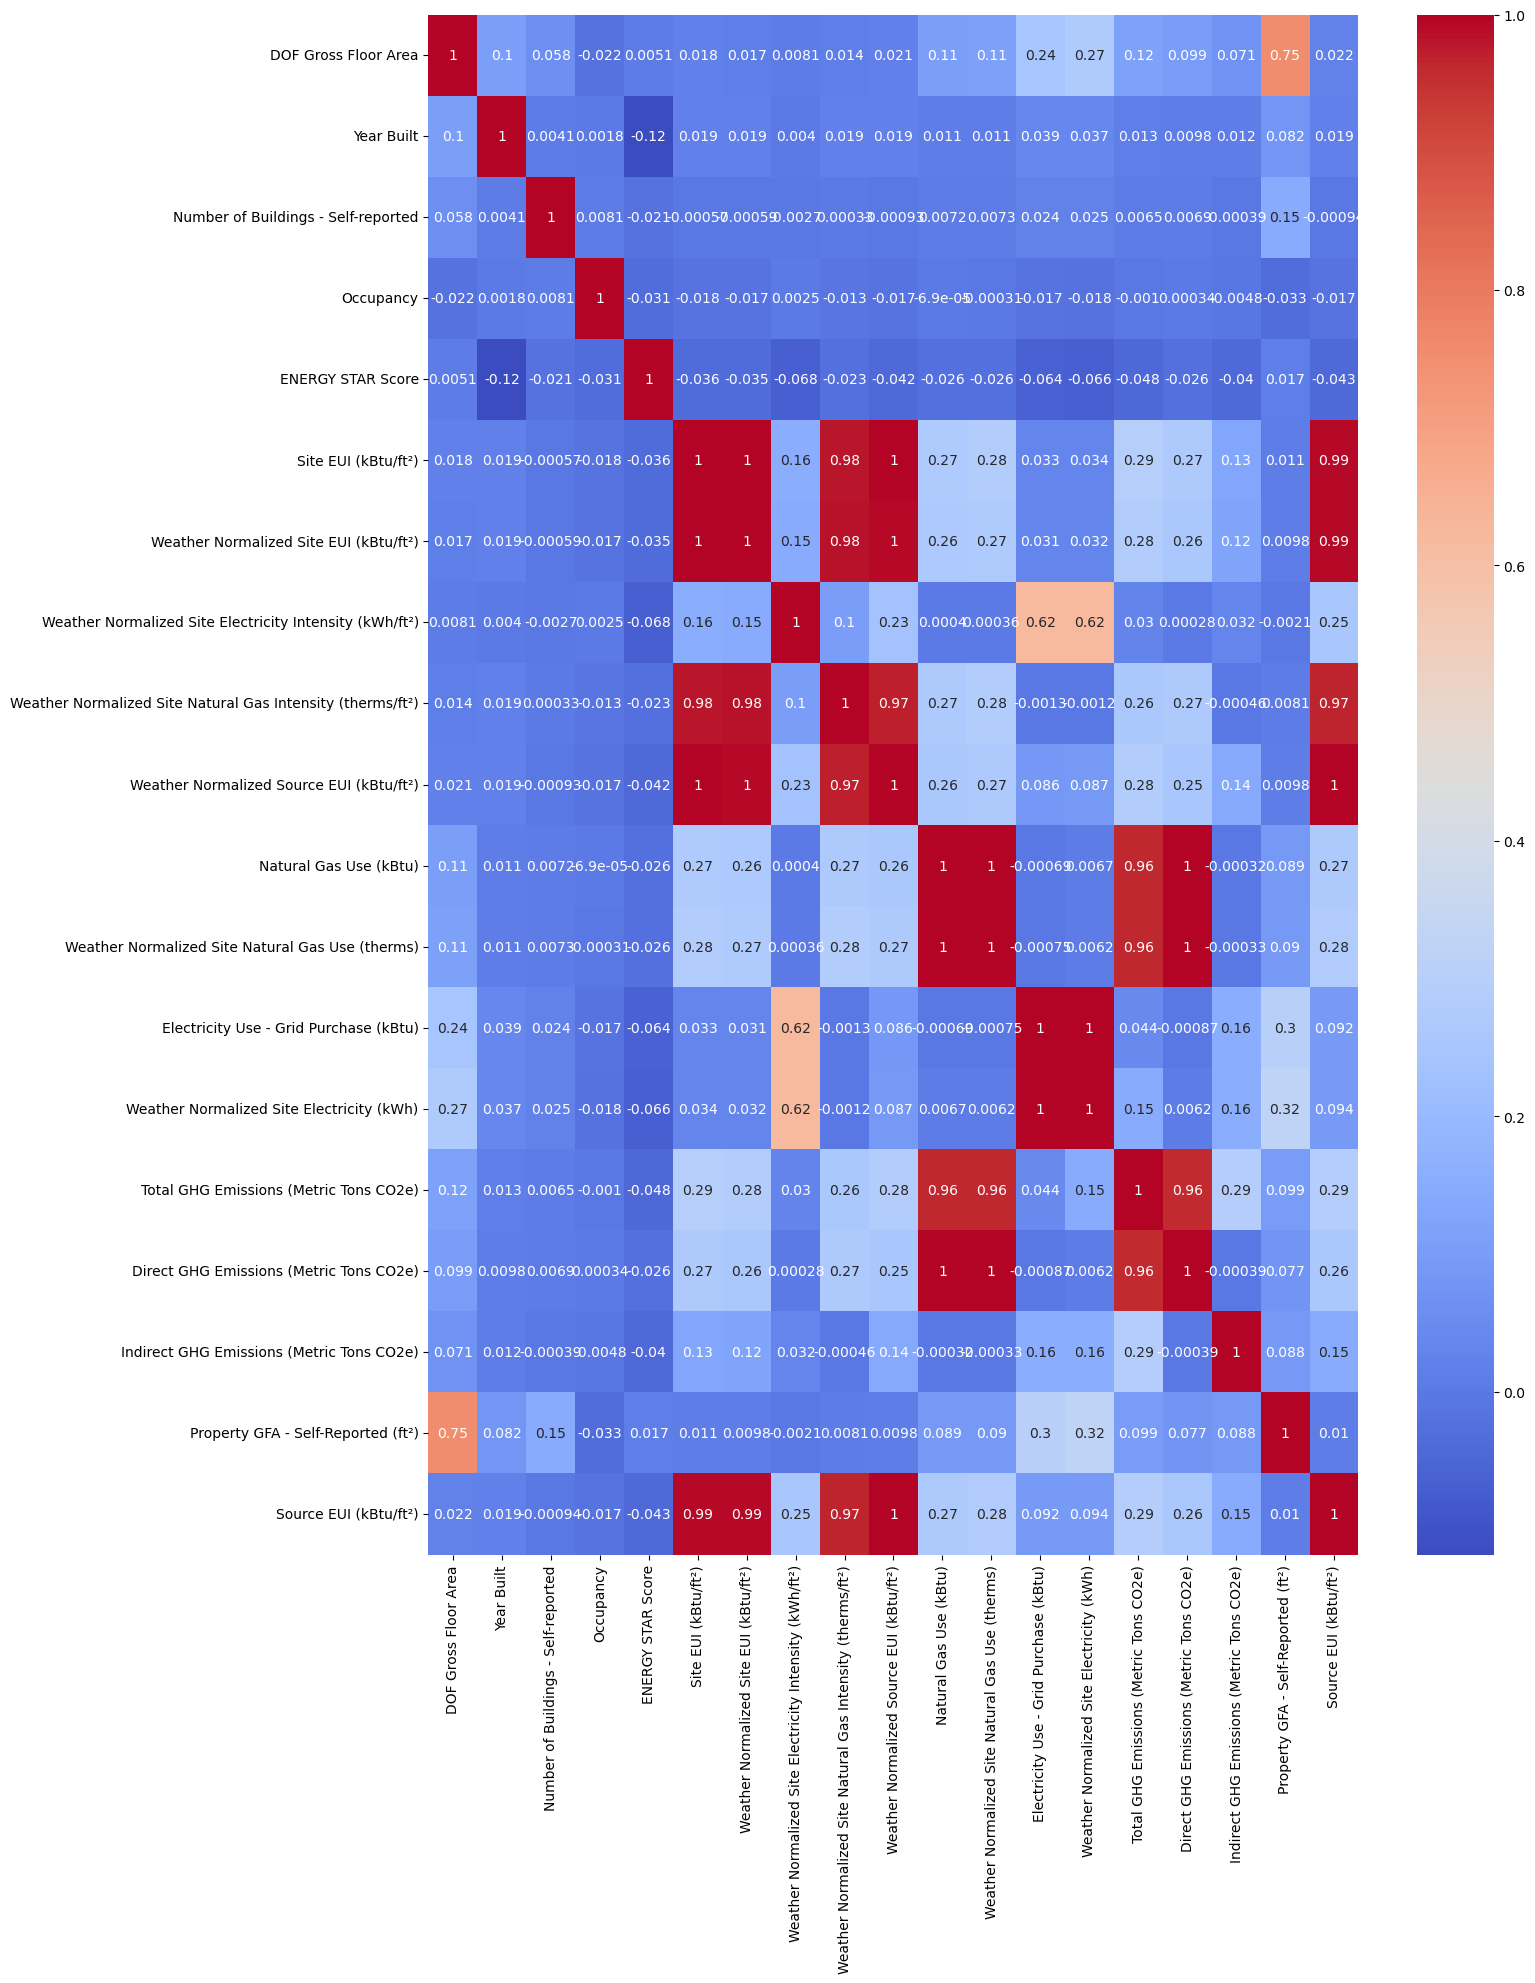

In [41]:
plt.figure(figsize=(15,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',)

C:\Users\91907\anaconda3.1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


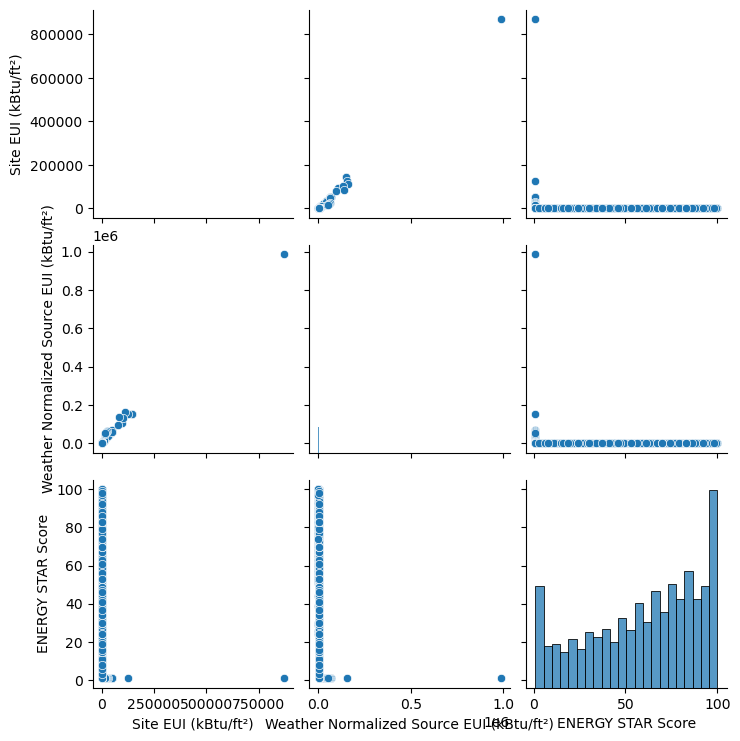

In [42]:
selected_features = [ 'Site EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)', 'ENERGY STAR Score']
sns.pairplot(df[selected_features])
plt.show()

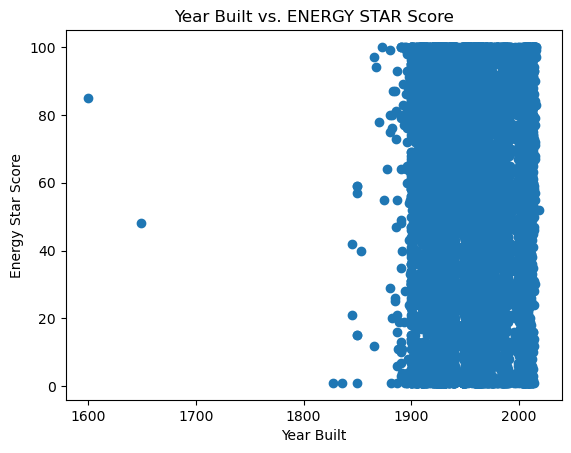

In [43]:
plt.scatter(df['Year Built'], df['ENERGY STAR Score'])
plt.xlabel('Year Built')
plt.ylabel('Energy Star Score')
plt.title('Year Built vs. ENERGY STAR Score')
plt.show()

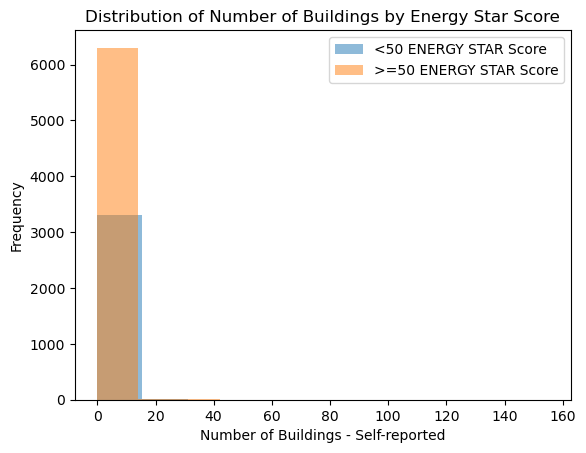

In [44]:
plt.hist(df[df['ENERGY STAR Score'] < 50]['Number of Buildings - Self-reported'], alpha=0.5, label='<50 ENERGY STAR Score')
plt.hist(df[df['ENERGY STAR Score'] >= 50]['Number of Buildings - Self-reported'], alpha=0.5, label='>=50 ENERGY STAR Score')
plt.xlabel('Number of Buildings - Self-reported')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Buildings by Energy Star Score')
plt.legend()
plt.show()

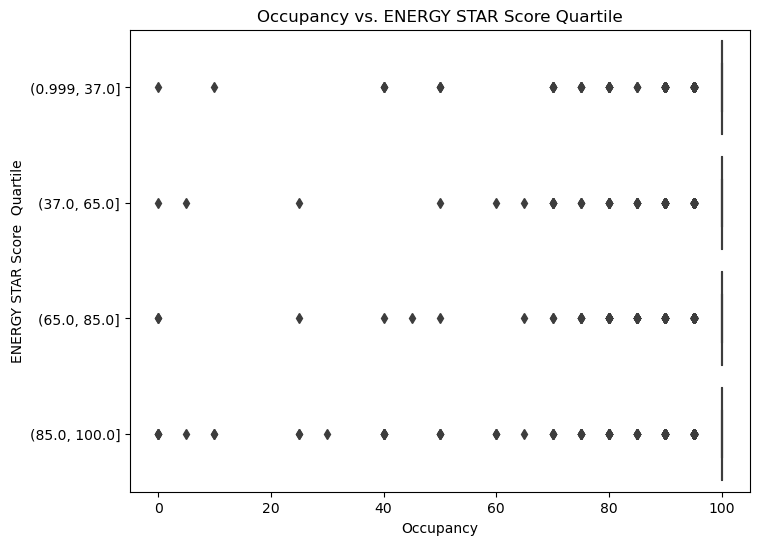

In [45]:
df['ENERGY STAR Score Quartile'] = pd.qcut(df['ENERGY STAR Score'], q=4)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Occupancy', y='ENERGY STAR Score Quartile', data=df)
plt.xlabel('Occupancy')
plt.ylabel('ENERGY STAR Score  Quartile')
plt.title('Occupancy vs. ENERGY STAR Score Quartile')
plt.show()

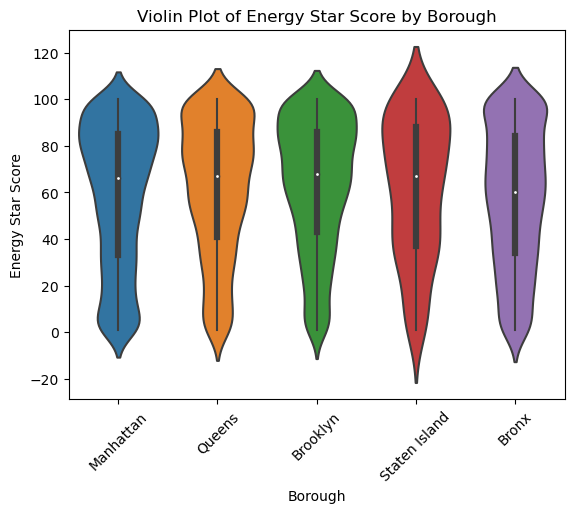

In [46]:
sns.violinplot(x='Borough', y='ENERGY STAR Score', data=df)
plt.xlabel('Borough')
plt.ylabel('Energy Star Score')
plt.title('Violin Plot of Energy Star Score by Borough')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Weather Normalized Site Electricity Intensity (kWh/ft²)'>

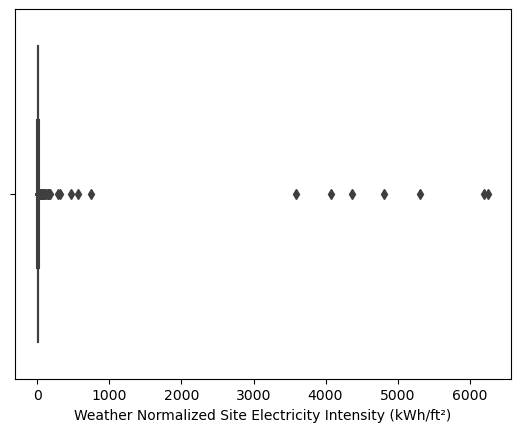

In [47]:
sns.boxplot(df,x="Weather Normalized Site Electricity Intensity (kWh/ft²)")

## Random forest
using random forest we can find the most important features and least important features 

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error


In [49]:
X = df_complete.drop(columns=['ENERGY STAR Score'])  # Features
y = df_complete['ENERGY STAR Score']

In [50]:
imputer = SimpleImputer(strategy='median')
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))
y_imputed = pd.Series(y_imputed.flatten(), index=y.index)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)


X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=22)

In [52]:
rf_model = RandomForestRegressor(random_state=22)

rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=22)

In [53]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 324.03610246010635


In [54]:
feature_importance = rf_model.feature_importances_


In [55]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance
print(feature_importance_df)

                                              Feature  Importance
17                              Source EUI (kBtu/ft²)    0.245200
8            Weather Normalized Source EUI (kBtu/ft²)    0.239492
4                                 Site EUI (kBtu/ft²)    0.120964
1                                          Year Built    0.059645
5              Weather Normalized Site EUI (kBtu/ft²)    0.052576
6   Weather Normalized Site Electricity Intensity ...    0.036838
0                                DOF Gross Floor Area    0.030694
14            Direct GHG Emissions (Metric Tons CO2e)    0.027667
13             Total GHG Emissions (Metric Tons CO2e)    0.027027
9                              Natural Gas Use (kBtu)    0.025075
16                 Property GFA - Self-Reported (ft²)    0.024752
11             Electricity Use - Grid Purchase (kBtu)    0.024621
10   Weather Normalized Site Natural Gas Use (therms)    0.024088
15          Indirect GHG Emissions (Metric Tons CO2e)    0.022220
12        

### now lets do another model training by dropping the null values instead of imputing

In [56]:
df_complete_dropna = df_complete.dropna(subset=['ENERGY STAR Score'])

In [57]:
X_dropna = df_complete_dropna.drop(columns=['ENERGY STAR Score']) 
y_dropna = df_complete_dropna['ENERGY STAR Score']

imputer = SimpleImputer(strategy='median')
X_dropna_imputed = imputer.fit_transform(X_dropna)


X_dropna_imputed_df = pd.DataFrame(X_dropna_imputed, columns=X_dropna.columns)


In [58]:
X_train_dropna, X_test_dropna, y_train_dropna, y_test_dropna = train_test_split(X_dropna_imputed_df, y_dropna, test_size=0.2, random_state=2)

In [59]:
rf_model_dropna = RandomForestRegressor(random_state=2)
rf_model_dropna.fit(X_train_dropna, y_train_dropna)

RandomForestRegressor(random_state=2)

In [60]:
y_pred_dropna_imputed = rf_model_dropna.predict(X_test_dropna)
mse_dropna_imputed = mean_squared_error(y_test_dropna, y_pred_dropna_imputed)
print("Mean Squared Error (after dropping null values and imputing missing values):", mse_dropna_imputed)

Mean Squared Error (after dropping null values and imputing missing values): 280.78786340072577


In [61]:
feature_importance_dropna_imputed = rf_model_dropna.feature_importances_

In [62]:
feature_importance_dropna_imputed_df = pd.DataFrame({'Feature': X_dropna_imputed_df.columns, 'Importance': feature_importance_dropna_imputed})
feature_importance_dropna_imputed_df = feature_importance_dropna_imputed_df.sort_values(by='Importance', ascending=False)


In [63]:
feature_importance_dropna_imputed_df

,Feature,Importance
17,Source EUI (kBtu/ft²),0.389880
8,Weather Normalized Source EUI (kBtu/ft²),0.203297
4,Site EUI (kBtu/ft²),0.121948
1,Year Built,0.047793
5,Weather Normalized Site EUI (kBtu/ft²),0.047441
6,Weather Normalized Site Electricity Intensity ...,0.025144
0,DOF Gross Floor Area,0.018696
9,Natural Gas Use (kBtu),0.018179
11,Electricity Use - Grid Purchase (kBtu),0.017940
14,Direct GHG Emissions (Metric Tons CO2e),0.017072


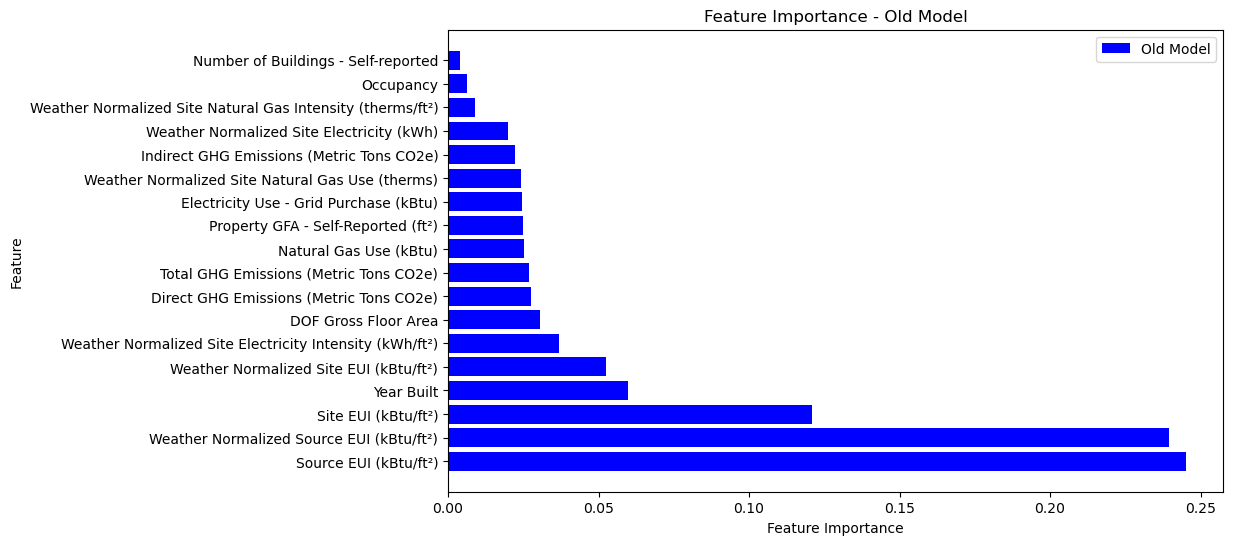

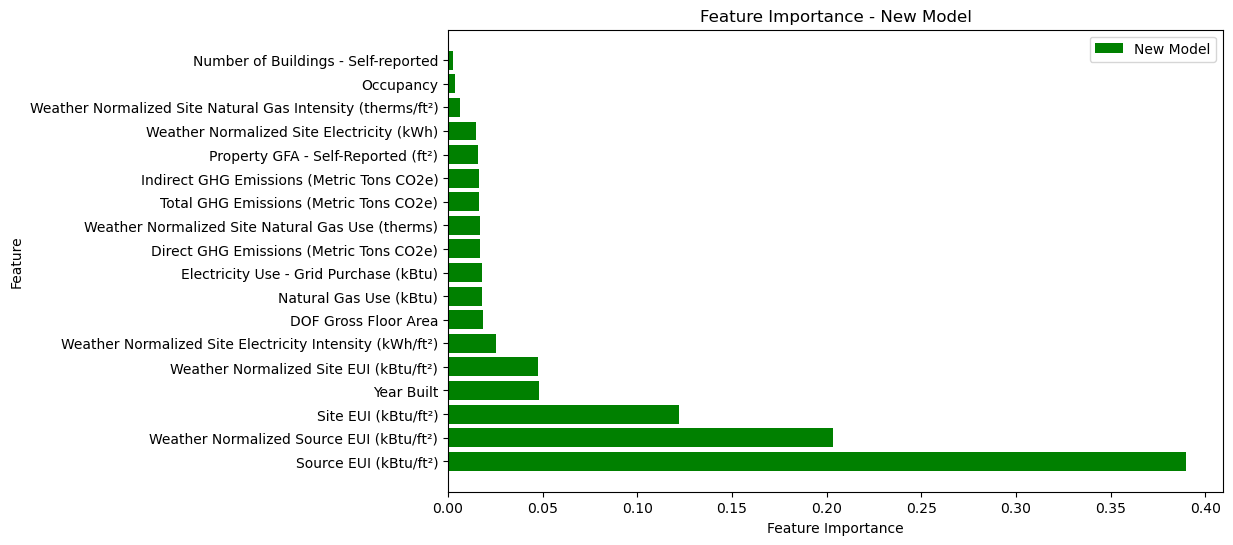

In [64]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue', label='Old Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Old Model')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_dropna_imputed_df['Feature'], feature_importance_dropna_imputed_df['Importance'], color='green', label='New Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - New Model')
plt.legend()
plt.show()

In [39]:
null_percentage=df_complete.isnull().sum()/len(df) * 100 
null_percentage

DOF Gross Floor Area                                           0.000000
Year Built                                                     0.000000
Number of Buildings - Self-reported                            0.000000
Occupancy                                                      0.000000
ENERGY STAR Score                                             17.912481
Site EUI (kBtu/ft²)                                            0.000000
Weather Normalized Site EUI (kBtu/ft²)                         0.000000
Weather Normalized Site Electricity Intensity (kWh/ft²)        6.700153
Weather Normalized Site Natural Gas Intensity (therms/ft²)    16.712072
Weather Normalized Source EUI (kBtu/ft²)                       0.000000
Natural Gas Use (kBtu)                                        12.276520
Weather Normalized Site Natural Gas Use (therms)              16.703559
Electricity Use - Grid Purchase (kBtu)                         0.000000
Weather Normalized Site Electricity (kWh)                      6

In [40]:
#using this feature importance info we can drop certain columns
#

<Axes: xlabel='Occupancy', ylabel='Count'>

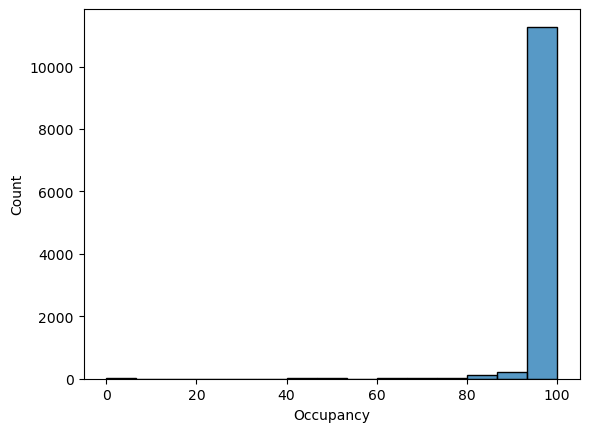

In [41]:
sns.histplot(df["Occupancy"])

In [42]:
df.drop(["Occupancy","Weather Normalized Site Natural Gas Intensity (therms/ft²)","Number of Buildings - Self-reported"],axis=1,inplace=True)

In [43]:
null_percentage=df.isnull().sum()/len(df) * 100 
null_percentage

Property Name                                               0.000000
Parent Property Name                                        0.000000
BBL - 10 digits                                             0.000000
NYC Borough, Block and Lot (BBL) self-reported              0.000000
NYC Building Identification Number (BIN)                    0.000000
Address 1 (self-reported)                                   0.000000
Street Name                                                 0.000000
Borough                                                     0.000000
DOF Gross Floor Area                                        0.000000
Primary Property Type - Self Selected                       0.000000
List of All Property Use Types at Property                  0.000000
Largest Property Use Type                                   0.000000
Largest Property Use Type - Gross Floor Area (ft²)          0.000000
Year Built                                                  0.000000
Metered Areas (Energy)            

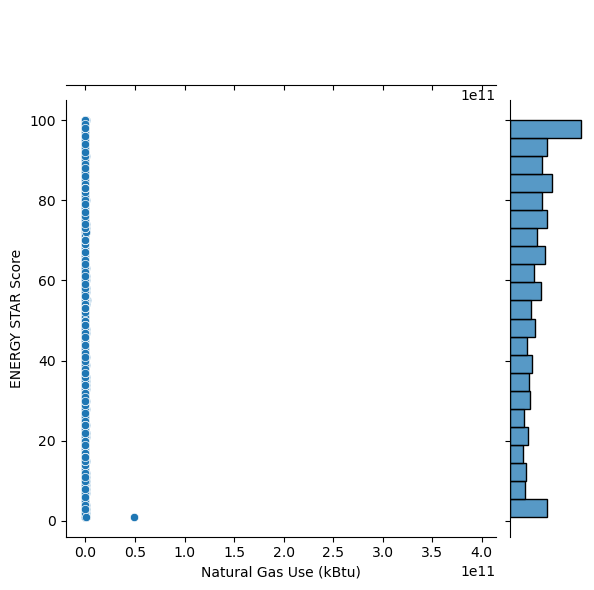

In [44]:
sns.jointplot(df,x="Natural Gas Use (kBtu)",y="ENERGY STAR Score")

In [44]:
df["Water Required?"].value_counts()

Water Required?
Yes    7611
No     4135
Name: count, dtype: int64

In [45]:
df = pd.get_dummies(df, columns=['Water Required?'], drop_first=True,dtype=int)

In [46]:
df["Water Required?_Yes"].value_counts()

Water Required?_Yes
1    7611
0    4135
Name: count, dtype: int64

In [47]:
# we can drop the Release Date column as it is just the date of submission which is not an important column for training
df.drop(["Release Date"],axis=1,inplace=True)

In [48]:
df['Water Required?_Yes'] = df['Water Required?_Yes'].astype('category')

In [49]:
df["DOF Benchmarking Submission Status"].value_counts()# we can drop this column as well has it is showing imbalance in data
df.drop(["DOF Benchmarking Submission Status"],axis=1,inplace=True)

In [50]:
df['BBL - 10 digits'].value_counts()


BBL - 10 digits
1019730001    26
4067920600    14
4067900001    13
1018860001    10
3019200001     8
              ..
1014880045     1
1014900001     1
1014900028     1
1014900122     1
3019600022     1
Name: count, Length: 11580, dtype: int64

In [51]:
df['BBL - 10 digits'].unique # dropping this column as well

<bound method Series.unique of 0         1013160001
1         1021380040
2         1021380030
3         1021390001
4         1021390085
            ...     
11741     3002380026
11742     3002640017
11743    3009870001​
11744     3010720040
11745     3019600022
Name: BBL - 10 digits, Length: 11746, dtype: object>

In [52]:
df.drop(["BBL - 10 digits"],axis=1,inplace= True)

In [53]:
df['NYC Borough, Block and Lot (BBL) self-reported'].value_counts()

NYC Borough, Block and Lot (BBL) self-reported
1019730001        26
4-06792-0600      14
4-06790-0001      13
1018860001        10
3-01920-0001       8
                  ..
1-01488-0045       1
1-01490-0001       1
1-01490-0028       1
1-01490-0122       1
3-01960-0022\t     1
Name: count, Length: 11581, dtype: int64

In [54]:
df.drop(["NYC Borough, Block and Lot (BBL) self-reported"],axis=1,inplace= True)

In [55]:
df.drop(["Address 1 (self-reported)","Street Name"],axis=1,inplace=True)

In [56]:
df['Property Name'].value_counts()

Property Name
Clinton West Condominium           2
Main Hospital                      2
Jetro Cash && Carry                2
East Building                      2
Fairchild                          2
                                  ..
E61                                1
Lawrence - 300 East 62nd Street    1
AKAM - 350 East 62nd Street        1
301 E 62 St.                       1
Tryad: 420 Clinton Ave             1
Name: count, Length: 11740, dtype: int64

In [57]:
df['Property Name'].describe()

count                        11746
unique                       11740
top       Clinton West Condominium
freq                             2
Name: Property Name, dtype: object

In [58]:
df['Parent Property Name'].value_counts()

Parent Property Name
Not Applicable: Standalone Property       11324
Columbia University (morningside)            57
New York University: Washington Square       33
Original Campus                              20
Second Housing Company Inc                   13
                                          ...  
Deepdale Corp 2 Cluster F                     1
Deepdale Corp 3 Cluster J                     1
Deepdale Corp 3 Cluster G                     1
Deepdale Corp 3 Cluster H                     1
Beech Hills Corp 1 Site 6                     1
Name: count, Length: 103, dtype: int64

In [59]:
df['Parent Property Name'].describe()

count                                   11746
unique                                    103
top       Not Applicable: Standalone Property
freq                                    11324
Name: Parent Property Name, dtype: object

In [60]:
df["NYC Building Identification Number (BIN)"].value_counts()

NYC Building Identification Number (BIN)
4455438    14
4455379    13
4451548     8
4451568     6
2008816     5
           ..
1045849     1
1045901     1
1045891     1
1081243     1
3055969     1
Name: count, Length: 11507, dtype: int64

In [61]:
df["NYC Building Identification Number (BIN)"].describe()

count       11746
unique      11507
top       4455438
freq           14
Name: NYC Building Identification Number (BIN), dtype: object

In [62]:
df.Borough.value_counts() # can convert this to category


Borough
Manhattan        5246
Brooklyn         2287
Queens           2101
Bronx            1950
Staten Island     162
Name: count, dtype: int64

In [63]:
df['Borough'] = df['Borough'].astype('category')


In [64]:
label_encoder = LabelEncoder()

In [65]:
df['Borough_encoded'] = label_encoder.fit_transform(df['Borough'])


print(df[['Borough', 'Borough_encoded']].head())

     Borough  Borough_encoded
0  Manhattan                2
1  Manhattan                2
2  Manhattan                2
3  Manhattan                2
4  Manhattan                2


<Axes: xlabel='Borough', ylabel='Count'>

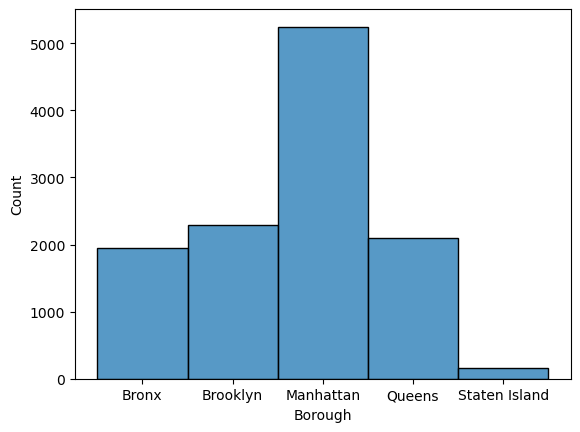

In [66]:
sns.histplot(df["Borough"])

In [67]:
df.drop(["Borough"],axis=1,inplace=True)

In [68]:
df.Borough_encoded.value_counts()

Borough_encoded
2    5246
1    2287
3    2101
0    1950
4     162
Name: count, dtype: int64

In [69]:
df[["Property Name","Parent Property Name"]].describe()

,Property Name,Parent Property Name
count,11746,11746
unique,11740,103
top,Clinton West Condominium,Not Applicable: Standalone Property
freq,2,11324


In [70]:
df.drop(["Property Name","Parent Property Name"],axis=1,inplace=True) # these columns are not important for model prediction

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 24 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   NYC Building Identification Number (BIN)                 11746 non-null  object  
 1   DOF Gross Floor Area                                     11746 non-null  float64 
 2   Primary Property Type - Self Selected                    11746 non-null  object  
 3   List of All Property Use Types at Property               11746 non-null  object  
 4   Largest Property Use Type                                11746 non-null  object  
 5   Largest Property Use Type - Gross Floor Area (ft²)       11746 non-null  object  
 6   Year Built                                               11746 non-null  int64   
 7   Metered Areas (Energy)                                   11746 non-null  object  
 8   ENERGY STAR Scor

In [72]:
df.drop(["NYC Building Identification Number (BIN)"],axis=1,inplace=True)

### Treating outliers

In [73]:
df_complete= df.select_dtypes(include=['float64', 'int64'])
df_complete=df_complete.drop(["ENERGY STAR Score"],axis=1)

In [74]:
from scipy.stats import zscore

In [75]:
z_scores = df_complete.apply(zscore)

In [76]:
threshold = 3

# Identify outliers using z-score
outliers = df[(z_scores > threshold).any(axis=1)]

In [77]:
outliers_per_column = {}

for column in z_scores.columns:
    outliers_per_column[column] = df[(z_scores[column] > threshold) | (z_scores[column] < -threshold)]


for column, outliers in outliers_per_column.items():
    print("Column '{}' has {} outliers.".format(column, len(outliers)))

Column 'DOF Gross Floor Area' has 147 outliers.
Column 'Year Built' has 19 outliers.
Column 'Site EUI (kBtu/ft²)' has 17 outliers.
Column 'Weather Normalized Site EUI (kBtu/ft²)' has 18 outliers.
Column 'Weather Normalized Site Electricity Intensity (kWh/ft²)' has 0 outliers.
Column 'Weather Normalized Source EUI (kBtu/ft²)' has 23 outliers.
Column 'Natural Gas Use (kBtu)' has 0 outliers.
Column 'Weather Normalized Site Natural Gas Use (therms)' has 0 outliers.
Column 'Electricity Use - Grid Purchase (kBtu)' has 60 outliers.
Column 'Weather Normalized Site Electricity (kWh)' has 0 outliers.
Column 'Total GHG Emissions (Metric Tons CO2e)' has 9 outliers.
Column 'Direct GHG Emissions (Metric Tons CO2e)' has 2 outliers.
Column 'Indirect GHG Emissions (Metric Tons CO2e)' has 16 outliers.
Column 'Property GFA - Self-Reported (ft²)' has 134 outliers.
Column 'Source EUI (kBtu/ft²)' has 23 outliers.


<Axes: >

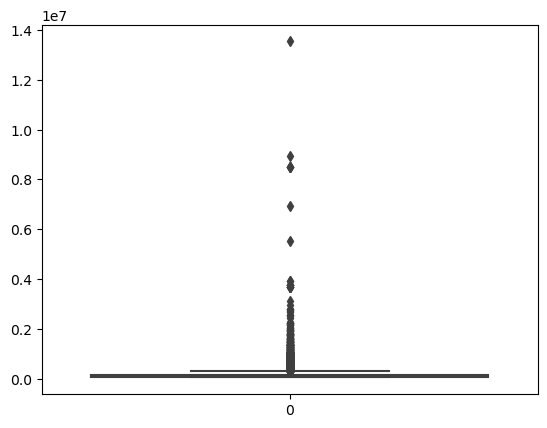

In [78]:
sns.boxplot(df["DOF Gross Floor Area"]) # Treating outliers

In [79]:
# converting DOF Gross floor area to a categorical column based on area to low,medium and high
bin_edges = [0, 80000, 120000, 1000000, float('inf')]  


bin_labels = ['Small', 'Medium', 'Large', 'Very Large']


df['DOF Gross Floor Area Category'] = pd.cut(df['DOF Gross Floor Area'], bins=bin_edges, labels=bin_labels)


df.head()

,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Metered Areas (Energy),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),...,Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Water Required?_Yes,Borough_encoded,DOF Gross Floor Area Category
0,289356.0,Office,Office,Office,293447,1963,Whole Building,NaN,305.6,303.1,...,38139374.2,11082770.5,6962.2,0.0,6962.2,762051,619.4,0,2,Large
1,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,1969,Whole Building,55.0,229.8,228.8,...,332365924.0,96261312.1,55870.4,51016.4,4854.1,3889181,404.3,0,2,Very Large
2,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,1924,Whole Building,NaN,359.9,359.9,...,86335350.5,NaN,0.0,0.0,0.0,231342,414.2,0,2,Large
3,891040.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748,1971,Whole Building,NaN,359.9,359.9,...,86335350.5,NaN,0.0,0.0,0.0,1305748,414.2,0,2,Large
4,211400.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),179694,1932,Whole Building,NaN,359.9,359.9,...,86335350.5,NaN,0.0,0.0,0.0,179694,414.2,0,2,Large


In [80]:
print(df[["DOF Gross Floor Area Category"]].value_counts())

DOF Gross Floor Area Category
Small                            4802
Large                            4173
Medium                           2575
Very Large                        196
Name: count, dtype: int64


In [81]:
df.drop(["DOF Gross Floor Area"],axis=1,inplace= True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21d2b8a42d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21d2b8a5a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d2b856010>],
 'medians': [<matplotlib.lines.Line2D at 0x21d2b8a6fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d2b8a5590>],
 'means': []}

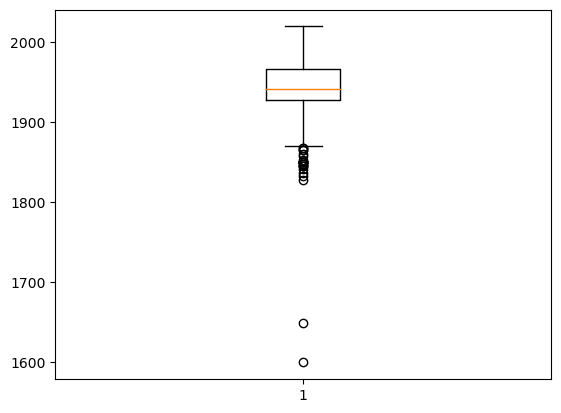

In [82]:
plt.boxplot(df["Year Built"])

In [83]:
df["Year Built"].value_counts()

Year Built
1928    417
1927    412
1929    389
1930    369
1931    327
       ... 
1874      1
1867      1
1875      1
1860      1
2019      1
Name: count, Length: 157, dtype: int64

In [84]:
bin_edges = [1500, 1800, 1850, 1900, 1950, 2000, 2050]  


bin_labels = ['Before 1800', '1800-1850', '1850-1900', '1900-1950', '1950-2000', 'After 2000']


df['Year Built Category'] = pd.cut(df['Year Built'], bins=bin_edges, labels=bin_labels, include_lowest=True)

In [85]:
df.drop(["Year Built"],axis=1,inplace= True)

In [86]:
df["Year Built Category"].value_counts()

Year Built Category
1900-1950      6179
1950-2000      4111
After 2000     1145
1850-1900       294
1800-1850        15
Before 1800       2
Name: count, dtype: int64

In [87]:
df.drop(["Property GFA - Self-Reported (ft²)"],axis=1,inplace=True)

In [88]:
df_complete.replace(np.nan,0,inplace=True)

In [89]:
df.update(df_complete)

In [90]:
null_percentage=df.isnull().sum()/len(df) * 100 
null_percentage

Primary Property Type - Self Selected                       0.000000
List of All Property Use Types at Property                  0.000000
Largest Property Use Type                                   0.000000
Largest Property Use Type - Gross Floor Area (ft²)          0.000000
Metered Areas (Energy)                                      0.000000
ENERGY STAR Score                                          17.912481
Site EUI (kBtu/ft²)                                         0.000000
Weather Normalized Site EUI (kBtu/ft²)                      0.000000
Weather Normalized Site Electricity Intensity (kWh/ft²)     0.000000
Weather Normalized Source EUI (kBtu/ft²)                    0.000000
Natural Gas Use (kBtu)                                      0.000000
Weather Normalized Site Natural Gas Use (therms)            0.000000
Electricity Use - Grid Purchase (kBtu)                      0.000000
Weather Normalized Site Electricity (kWh)                   0.000000
Total GHG Emissions (Metric Tons C

In [91]:
df_complete= df.select_dtypes(include=['float64', 'int64'])
df_complete=df_complete.drop(["ENERGY STAR Score"],axis=1)

In [92]:
df_complete.skew()   #almost all columns are highly skewed to the right

Site EUI (kBtu/ft²)                                         88.085861
Weather Normalized Site EUI (kBtu/ft²)                      90.246739
Weather Normalized Site Electricity Intensity (kWh/ft²)     42.465491
Weather Normalized Source EUI (kBtu/ft²)                    84.279652
Natural Gas Use (kBtu)                                     106.066803
Weather Normalized Site Natural Gas Use (therms)           105.709124
Electricity Use - Grid Purchase (kBtu)                      37.112254
Weather Normalized Site Electricity (kWh)                   37.571319
Total GHG Emissions (Metric Tons CO2e)                      94.453708
Direct GHG Emissions (Metric Tons CO2e)                    106.066242
Indirect GHG Emissions (Metric Tons CO2e)                   62.570631
Source EUI (kBtu/ft²)                                       81.565151
dtype: float64

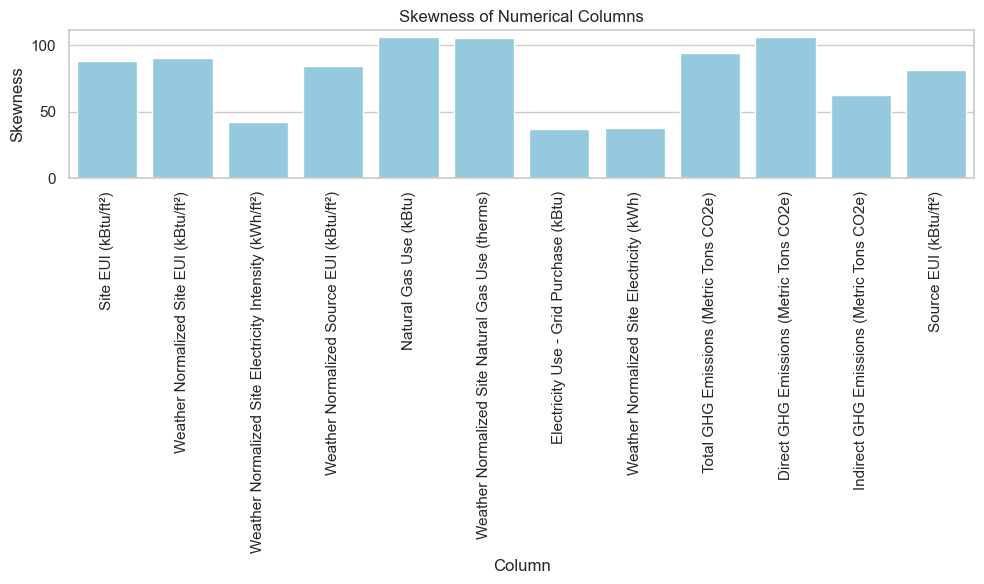

In [93]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.barplot(x=df_complete.columns, y=df_complete.skew(), color='skyblue')
plt.title('Skewness of Numerical Columns')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x21d2c188150>,
 'caps': [<matplotlib.lines.Line2D at 0x21d2c189890>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d2c17b510>,
 'medians': [<matplotlib.lines.Line2D at 0x21d2c18ae90>,
 'fliers': [<matplotlib.lines.Line2D at 0x21d2c18b910>,
 'means': []}

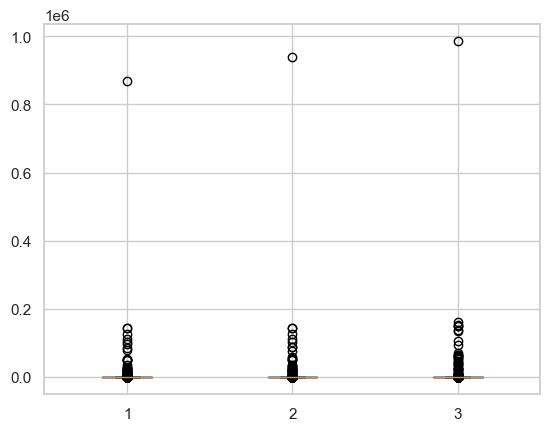

In [94]:
plt.boxplot(df_complete[["Site EUI (kBtu/ft²)","Weather Normalized Site EUI (kBtu/ft²)","Weather Normalized Source EUI (kBtu/ft²)",
                         ]])

<Axes: >

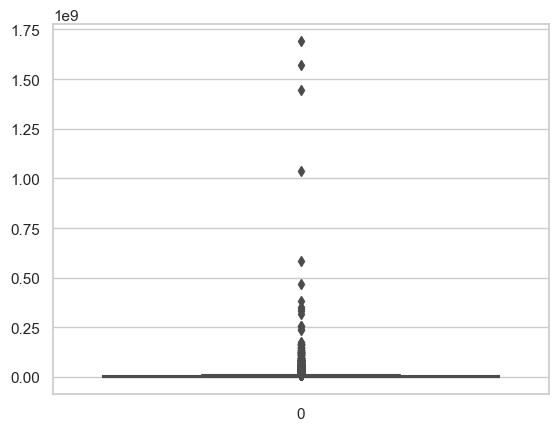

In [95]:
sns.boxplot(df_complete["Electricity Use - Grid Purchase (kBtu)"])

In [96]:
# converting Electricity Use  to a categorical column based on area to low,medium,high and very high
bin_edges = [0, 15000, 1200000, 8000000, float('inf')]  


bin_labels = ['Low', 'Medium', 'High', 'Very High']


df['Electricity Use - Grid Purchase (kBtu)'] = pd.cut(df['Electricity Use - Grid Purchase (kBtu)'], bins=bin_edges, labels=bin_labels)




In [97]:
df.drop(["Electricity Use - Grid Purchase (kBtu)"],axis=1,inplace=True)

In [98]:
df_complete= df.select_dtypes(include=['float64', 'int64'])
df_complete=df_complete.drop(["ENERGY STAR Score"],axis=1)

In [99]:
'Total GHG Emissions (Metric Tons CO2e)', 'Direct GHG Emissions (Metric Tons CO2e)','Indirect GHG Emissions (Metric Tons CO2e)',

('Total GHG Emissions (Metric Tons CO2e)',
 'Direct GHG Emissions (Metric Tons CO2e)',
 'Indirect GHG Emissions (Metric Tons CO2e)')

{'whiskers': [<matplotlib.lines.Line2D at 0x21d2dfbd550>,
 'caps': [<matplotlib.lines.Line2D at 0x21d2dfbecd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d2dfbc910>,
 'medians': [<matplotlib.lines.Line2D at 0x21d2dfc8290>,
 'fliers': [<matplotlib.lines.Line2D at 0x21d2b48b790>,
 'means': []}

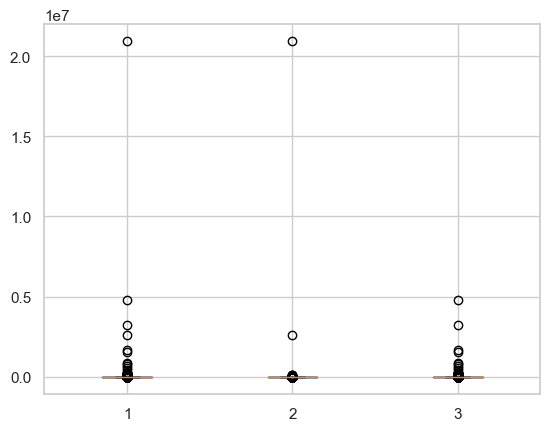

In [100]:
plt.boxplot(df_complete[['Total GHG Emissions (Metric Tons CO2e)', 
                         'Direct GHG Emissions (Metric Tons CO2e)','Indirect GHG Emissions (Metric Tons CO2e)']])

In [101]:
column_medians = df_complete.median()


df_complete = df_complete.apply(lambda x: x.mask(x > 800000, column_medians[x.name]))

{'whiskers': [<matplotlib.lines.Line2D at 0x21d2ddfb790>,
 'caps': [<matplotlib.lines.Line2D at 0x21d2de04dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d2ddfad90>,
 'medians': [<matplotlib.lines.Line2D at 0x21d2de062d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x21d2b842190>,
 'means': []}

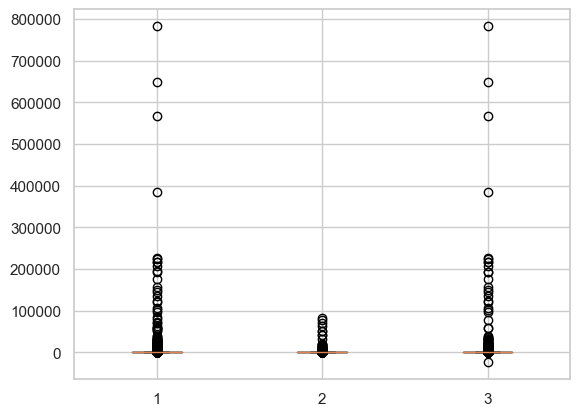

In [102]:
plt.boxplot(df_complete[['Total GHG Emissions (Metric Tons CO2e)', 
                         'Direct GHG Emissions (Metric Tons CO2e)','Indirect GHG Emissions (Metric Tons CO2e)']])

{'whiskers': [<matplotlib.lines.Line2D at 0x21d2de9bed0>,
 'caps': [<matplotlib.lines.Line2D at 0x21d2dea5850>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d2de9b390>,
 'medians': [<matplotlib.lines.Line2D at 0x21d2dea6e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x21d2dea7810>,
 'means': []}

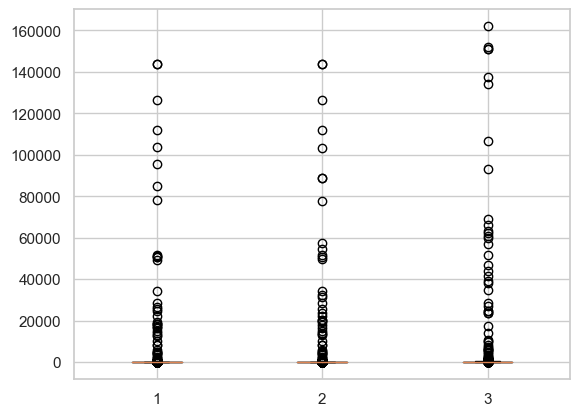

In [103]:
plt.boxplot(df_complete[["Site EUI (kBtu/ft²)","Weather Normalized Site EUI (kBtu/ft²)","Weather Normalized Source EUI (kBtu/ft²)",
                         ]])

In [104]:
#checking for any negative values 

negative_columns = df_complete.columns[(df_complete < 0).any()]

if len(negative_columns) > 0:
    print("Negative values exist in the following columns:")
    for column in negative_columns:
        print(column)
else:
    print("No negative values found in the DataFrame.")

Negative values exist in the following columns:
Indirect GHG Emissions (Metric Tons CO2e)


In [105]:
#replacing neg value to positive
df_complete['Indirect GHG Emissions (Metric Tons CO2e)'] = df_complete['Indirect GHG Emissions (Metric Tons CO2e)'].abs()

In [106]:
df_complete.skew() 

Site EUI (kBtu/ft²)                                        33.024608
Weather Normalized Site EUI (kBtu/ft²)                     32.456560
Weather Normalized Site Electricity Intensity (kWh/ft²)    42.465491
Weather Normalized Source EUI (kBtu/ft²)                   29.792727
Natural Gas Use (kBtu)                                     -0.787979
Weather Normalized Site Natural Gas Use (therms)            3.793682
Weather Normalized Site Electricity (kWh)                  -0.527287
Total GHG Emissions (Metric Tons CO2e)                     39.101982
Direct GHG Emissions (Metric Tons CO2e)                    31.371268
Indirect GHG Emissions (Metric Tons CO2e)                  40.241704
Source EUI (kBtu/ft²)                                      30.214768
dtype: float64

In [107]:
# making the data more normalized
from scipy.stats import boxcox


In [108]:
high_skew_columns = df_complete.columns[df_complete.skew() > 3]

for column in high_skew_columns:
    
    min_value = df_complete[column].min()
    if min_value <= 0:
        shift_amount = abs(min_value) + 1  
        shifted_data = df_complete[column] + shift_amount

       
        transformed_data, _ = boxcox(shifted_data)

      
        
        df_complete[column] = transformed_data

In [109]:
df_complete.skew() # almost all values are close to the mean

Site EUI (kBtu/ft²)                                       -0.019900
Weather Normalized Site EUI (kBtu/ft²)                    -0.002704
Weather Normalized Site Electricity Intensity (kWh/ft²)   -0.006531
Weather Normalized Source EUI (kBtu/ft²)                   0.025549
Natural Gas Use (kBtu)                                    -0.787979
Weather Normalized Site Natural Gas Use (therms)          -0.428616
Weather Normalized Site Electricity (kWh)                 -0.527287
Total GHG Emissions (Metric Tons CO2e)                     0.190768
Direct GHG Emissions (Metric Tons CO2e)                    0.244579
Indirect GHG Emissions (Metric Tons CO2e)                  0.029691
Source EUI (kBtu/ft²)                                      0.019704
dtype: float64

In [110]:
df[df_complete.columns] = df_complete

In [111]:
df.head()

,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Metered Areas (Energy),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Source EUI (kBtu/ft²),...,Weather Normalized Site Natural Gas Use (therms),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Source EUI (kBtu/ft²),Water Required?_Yes,Borough_encoded,DOF Gross Floor Area Category,Year Built Category
0,Office,Office,Office,293447,Whole Building,NaN,5.657617,5.708184,3.614484,6.519977,...,0.000000,493730.6,12.097715,0.000000,9.534382,6.507230,0,2,Large,1950-2000
1,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Whole Building,55.0,5.380172,5.428913,3.215662,6.082120,...,40.070179,493730.6,16.155055,55.572825,9.117704,6.071617,0,2,Very Large,1950-2000
2,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Whole Building,NaN,5.816766,5.878871,0.000000,6.115100,...,0.000000,0.0,0.000000,0.000000,0.000000,6.096291,0,2,Large,1900-1950
3,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748,Whole Building,NaN,5.816766,5.878871,0.000000,6.115100,...,0.000000,0.0,0.000000,0.000000,0.000000,6.096291,0,2,Large,1950-2000
4,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),179694,Whole Building,NaN,5.816766,5.878871,0.000000,6.115100,...,0.000000,0.0,0.000000,0.000000,0.000000,6.096291,0,2,Large,1900-1950


In [112]:
df.drop(["Largest Property Use Type - Gross Floor Area (ft²)"],axis=1,inplace= True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 20 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   Primary Property Type - Self Selected                    11746 non-null  object  
 1   List of All Property Use Types at Property               11746 non-null  object  
 2   Largest Property Use Type                                11746 non-null  object  
 3   Metered Areas (Energy)                                   11746 non-null  object  
 4   ENERGY STAR Score                                        9642 non-null   float64 
 5   Site EUI (kBtu/ft²)                                      11746 non-null  float64 
 6   Weather Normalized Site EUI (kBtu/ft²)                   11746 non-null  float64 
 7   Weather Normalized Site Electricity Intensity (kWh/ft²)  11746 non-null  float64 
 8   Weather Normaliz

In [114]:
from sklearn.preprocessing import LabelEncoder


categorical_columns = df.select_dtypes(include=["category"]).columns


label_encoder = LabelEncoder()


for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


df.head()

,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Metered Areas (Energy),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Source EUI (kBtu/ft²),Water Required?_Yes,Borough_encoded,DOF Gross Floor Area Category,Year Built Category
0,Office,Office,Office,Whole Building,NaN,5.657617,5.708184,3.614484,6.519977,0.0,0.000000,493730.6,12.097715,0.000000,9.534382,6.507230,0,2,0,3
1,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Whole Building,55.0,5.380172,5.428913,3.215662,6.082120,3483199.8,40.070179,493730.6,16.155055,55.572825,9.117704,6.071617,0,2,3,3
2,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Whole Building,NaN,5.816766,5.878871,0.000000,6.115100,0.0,0.000000,0.0,0.000000,0.000000,0.000000,6.096291,0,2,0,2
3,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Whole Building,NaN,5.816766,5.878871,0.000000,6.115100,0.0,0.000000,0.0,0.000000,0.000000,0.000000,6.096291,0,2,0,3
4,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Whole Building,NaN,5.816766,5.878871,0.000000,6.115100,0.0,0.000000,0.0,0.000000,0.000000,0.000000,6.096291,0,2,0,2


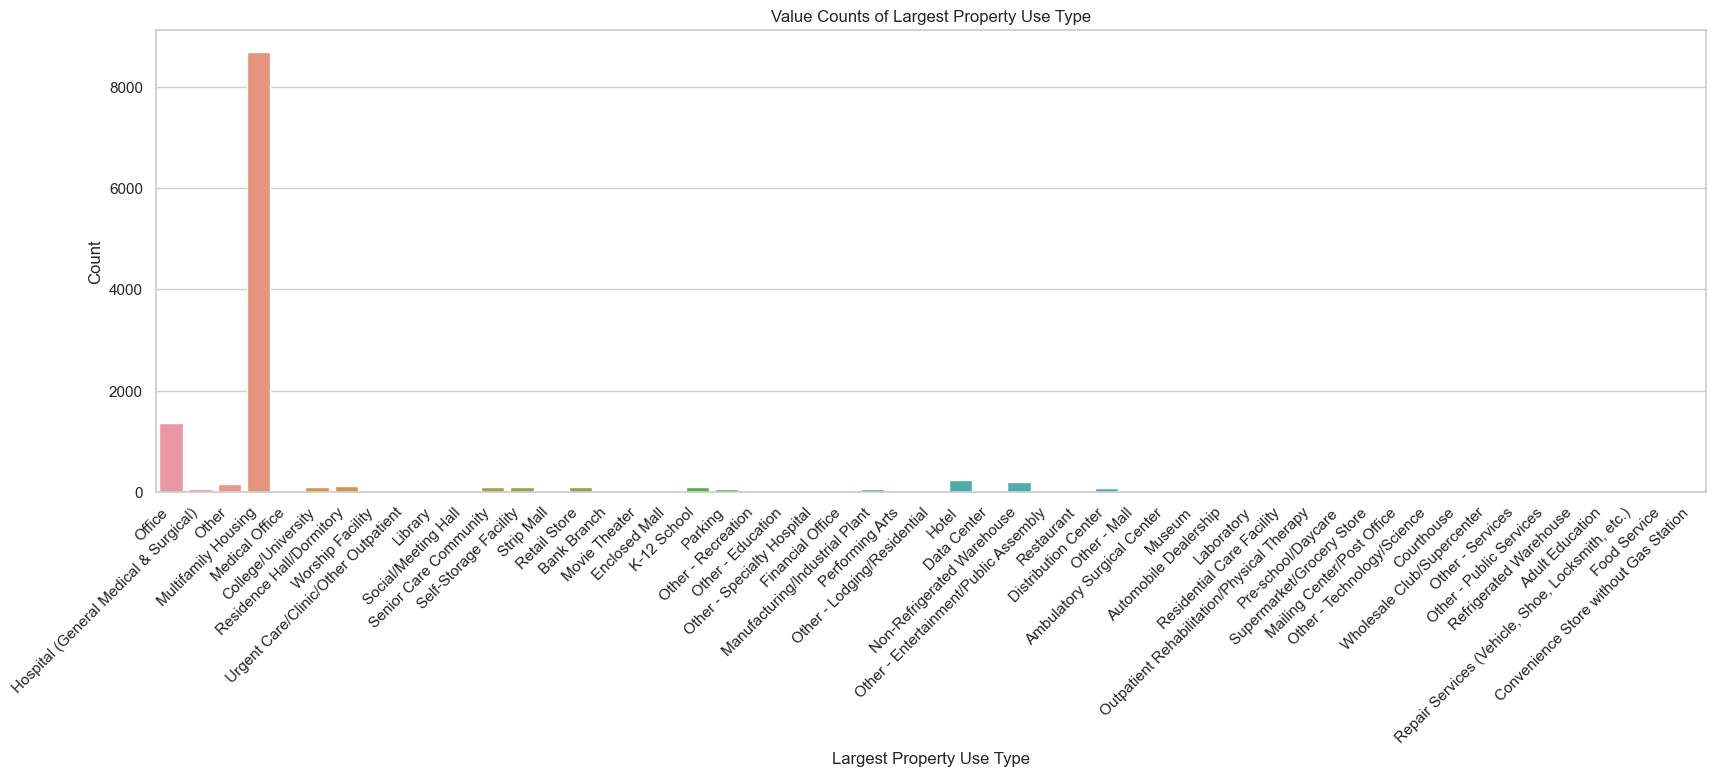

In [115]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x="Largest Property Use Type")
plt.xticks(rotation=45, ha='right')
plt.title("Value Counts of Largest Property Use Type")
plt.xlabel("Largest Property Use Type")
plt.ylabel("Count")
plt.show()

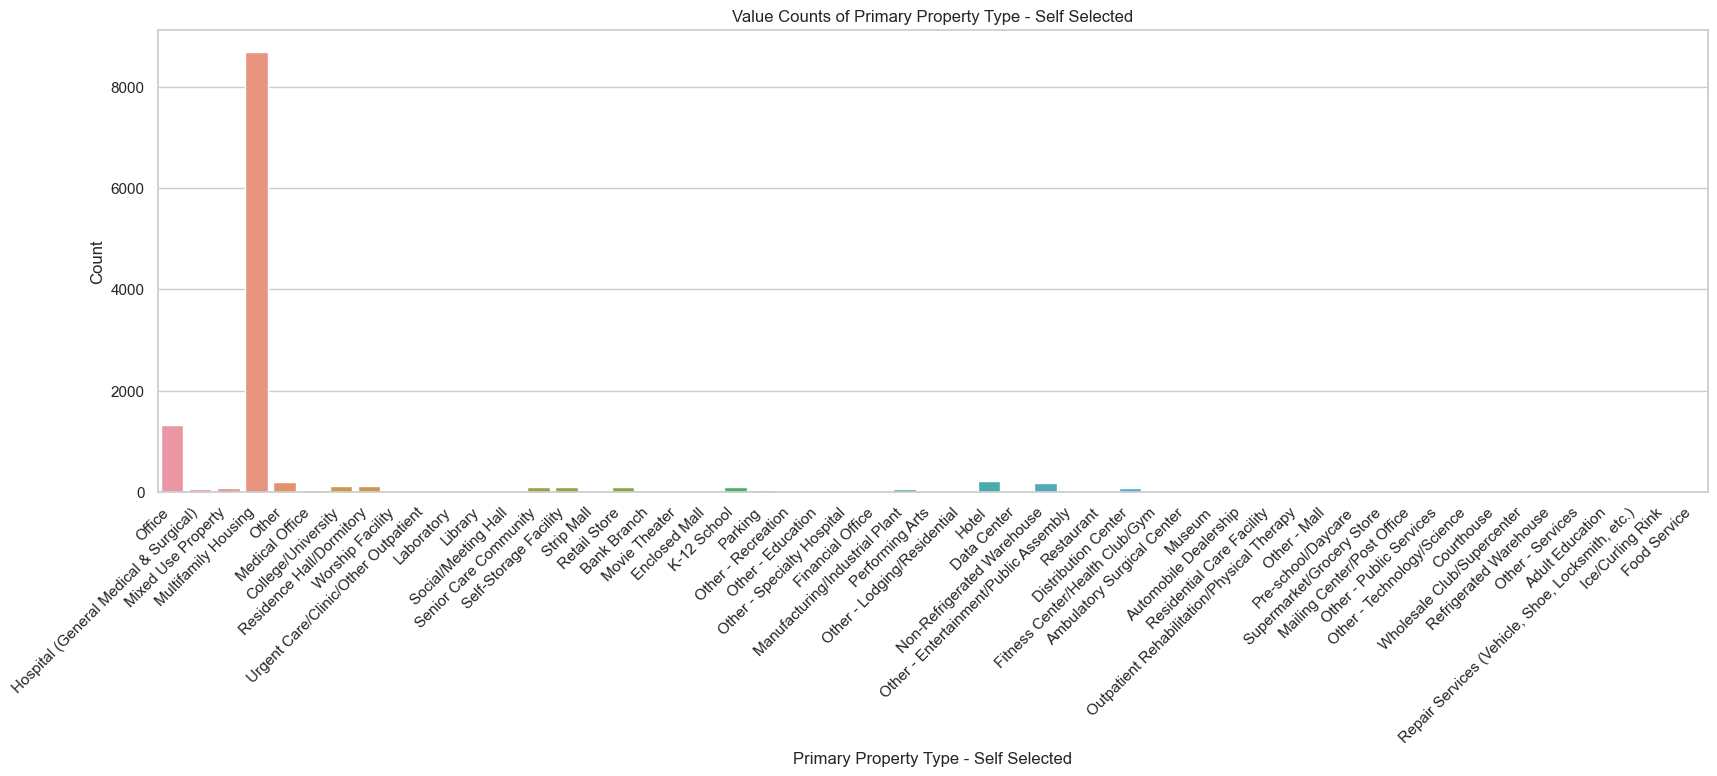

In [116]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x="Primary Property Type - Self Selected")
plt.xticks(rotation=45, ha='right')
plt.title("Value Counts of Primary Property Type - Self Selected")
plt.xlabel("Primary Property Type - Self Selected")
plt.ylabel("Count")
plt.show()

In [117]:
print(len(df["Largest Property Use Type"].unique()))

53


In [118]:
value_counts = df['Largest Property Use Type'].value_counts()

top_categories = value_counts[value_counts > 100].index.tolist()


df['Largest Property Use Type'] = df['Largest Property Use Type'].apply(
    lambda x: x if x in top_categories else 'Others'
)


df['Largest Property Use Type'] = pd.Categorical(df['Largest Property Use Type'])


In [119]:
df["Largest Property Use Type"].value_counts()

Largest Property Use Type
Multifamily Housing           8694
Office                        1364
Others                         889
Hotel                          227
Non-Refrigerated Warehouse     202
Other                          154
Residence Hall/Dormitory       112
K-12 School                    104
Name: count, dtype: int64

In [120]:
label_encoder = LabelEncoder()


df['Largest Property Use Type Encoded'] = label_encoder.fit_transform(df['Largest Property Use Type'])




In [121]:
df.drop(["Primary Property Type - Self Selected",
         "List of All Property Use Types at Property",
         "Largest Property Use Type","Metered Areas (Energy)"],axis=1,inplace=True)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 17 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   ENERGY STAR Score                                        9642 non-null   float64
 1   Site EUI (kBtu/ft²)                                      11746 non-null  float64
 2   Weather Normalized Site EUI (kBtu/ft²)                   11746 non-null  float64
 3   Weather Normalized Site Electricity Intensity (kWh/ft²)  11746 non-null  float64
 4   Weather Normalized Source EUI (kBtu/ft²)                 11746 non-null  float64
 5   Natural Gas Use (kBtu)                                   11746 non-null  float64
 6   Weather Normalized Site Natural Gas Use (therms)         11746 non-null  float64
 7   Weather Normalized Site Electricity (kWh)                11746 non-null  float64
 8   Total GHG Emissions (Metri

## Model Training

In [123]:

final_df=df.copy()


In [155]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [125]:
#As there missing values in the target column,we need to either drop missing values or impute using mean,median or by predciting
df.dropna(subset=['ENERGY STAR Score'], inplace=True)


X = df.drop(columns=['ENERGY STAR Score'])
y = df['ENERGY STAR Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)



## Random forest model

In [126]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)




In [127]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 172.5030145109729


In [128]:
mae=mean_absolute_error(y_test,y_pred)
mae

9.13038448246069

In [129]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8089741981044731

### further fine tuning the model using hyperparameter tuning 

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
model = RandomForestRegressor()


In [132]:
param_grid = {'n_estimators': [50, 100],'max_depth': [None, 10, 20]}

In [133]:
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error',n_jobs=-1)


In [134]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error')

In [144]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

r2=r2_score(y_test,y_pred)


In [137]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [140]:
mae #we have a slightly better error rate

8.926584708116428

In [145]:
r2

0.8183534917234822

## linear regression model training

In [149]:
linear_model = LinearRegression()


In [150]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [152]:
y_pred = linear_model.predict(X_test)


In [153]:
mae = mean_absolute_error(y_test, y_pred)

r2=r2_score(y_test,y_pred)


In [154]:
print(mae)
print(r2)

17.840166419041495
0.44787745320138095


## Decison tree model

In [156]:
dt_model=DecisionTreeRegressor()

In [157]:
dt_model.fit(X_train, y_train)


DecisionTreeRegressor()

In [159]:
y_pred = dt_model.predict(X_test)


In [161]:
mae=mean_absolute_error(y_test,y_pred)
mae

13.031104199066874

In [162]:
r2=r2_score(y_test,y_pred)
r2

0.5941645588149496

### hyperparamter tuning

In [163]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']}


decision_tree = DecisionTreeRegressor()

In [164]:
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [165]:
grid_search.fit(X_train, y_train)


C:\Users\91907\anaconda3.1\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
113 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91907\anaconda3.1\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91907\anaconda3.1\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\91907\anaconda3.1\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\91907\anaconda3.1\Lib\s

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [166]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [167]:
best_decision_tree = grid_search.best_estimator_


In [168]:
y_pred = best_decision_tree.predict(X_test)


In [169]:
mae=mean_absolute_error(y_test,y_pred)
mae

11.247301909602015

In [171]:
r2=r2_score(y_test,y_pred)
r2

0.7070953876737677

## Conclusion

In conclusion the best model after training is the random forest with least error rate of 8.9